In [31]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

# Veri setini yükleme
df = pd.read_excel("/kaggle/input/co2emisyon/dataset.xlsx", 0)
def change(col):
    marka_kodlari = {
        'Acura': 0,
        'Audi': 1,
        'BMW': 2,
        'Buick': 3,
        'Chevrolet': 4,
        'Dodge': 5,
        'Ford': 6,
        'GMC': 7,
        'Honda': 8,
        'Hyundai': 9,
        'Jaguar': 10,
        'Jeep': 11,
        'Land Rover': 12,
        'Mazda': 13,
        'Mercedes-BenG': 14,
        'Mitsubishi': 15,
        'Nissan': 16,
        'Plymouth': 17,
        'Toyota': 18,
        'Volkswagen': 19
    }
    return marka_kodlari.get(col, 20)  # 20, listelenmeyen markalar için

df['Make'] = df['Make'].apply(change)
print(df.head())
# Veriyi hazırlama
X = df[['Model_Year', 'Make', 'Engine_Size', 'Combined', 'Fuel_Type']].values
y = df['CO2Emissions'].values


   Model_Year  Make  Engine_Size  Combined  Fuel_Type  CO2Emissions
0        2024     0          1.5       7.4          3           172
1        2024     0          1.5       7.8          3           181
2        2024     3          1.3       7.8          3           183
3        2024     3          1.3       8.8          3           207
4        2024     3          1.2       7.9          3           185


In [32]:

df = df.drop('Model_Year', axis=1)

<ipython-input-33-3f986228e1e2>:37: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if correlations[i] >= 0:
<ipython-input-33-3f986228e1e2>:38: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  bar.set_color(plt.cm.RdBu(0.75 + correlations[i]/4))


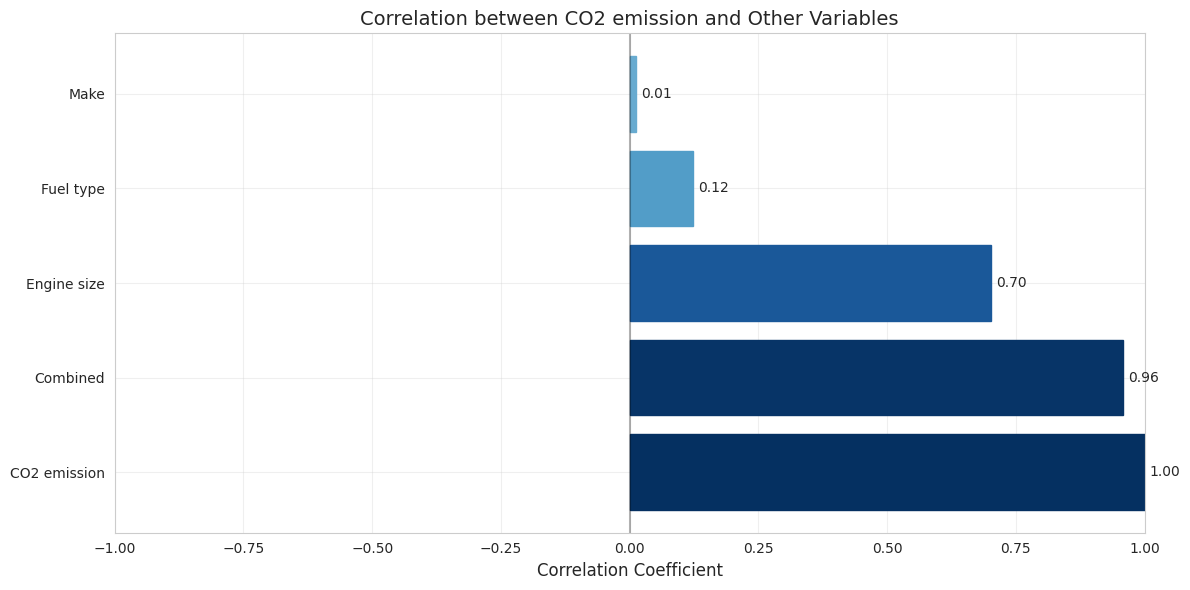

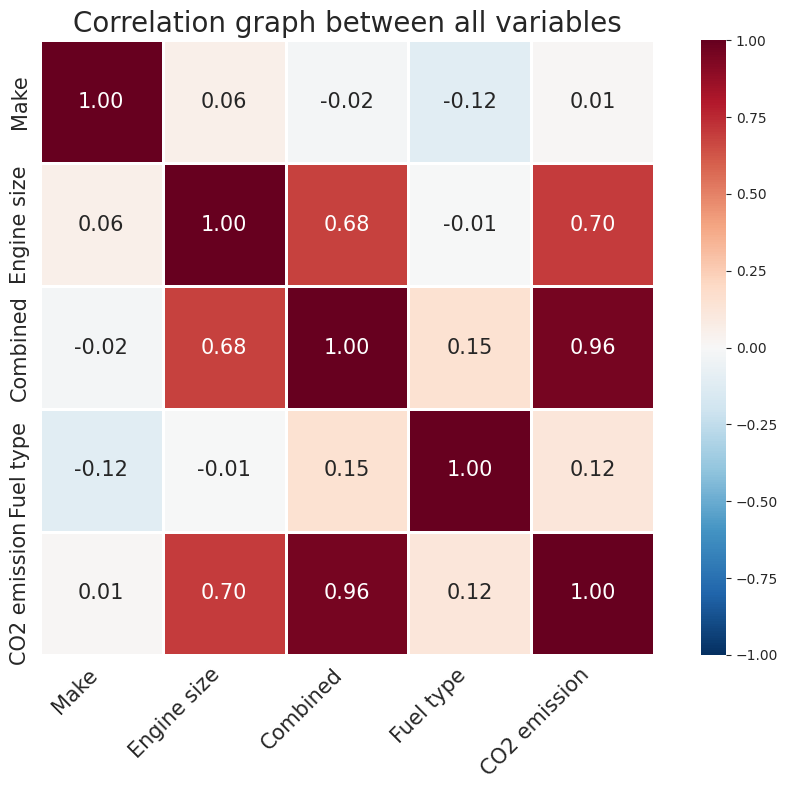

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def format_column_name(column):
   # CO2Emissions gibi özel durumları kontrol et
   if 'CO2' in column:
       return 'CO2 emission'

   # Diğer sütun isimleri için
   words = column.split('_')
   # İlk kelimenin ilk harfi büyük, diğerleri küçük
   formatted_words = [words[0].capitalize()]
   # Sonraki kelimeler küçük harfle başlasın
   formatted_words.extend(word.lower() for word in words[1:])
   return ' '.join(formatted_words)

def plot_correlations(df, target_column):
   # Sütun isimlerini düzenle
   df = df.copy()
   df.columns = [format_column_name(col) for col in df.columns]

   # Hedef sütun ismini formatla
   target_column = format_column_name(target_column)

   # Korelasyonları hesapla ve hedef sütuna göre sırala
   correlations = df.corr()[target_column].sort_values(ascending=False)

   # Figür boyutunu ayarla
   plt.figure(figsize=(12, 6))

   # Çubuk grafiği oluştur
   bars = plt.barh(range(len(correlations)), correlations)

   # Çubukları renklendir
   for i, bar in enumerate(bars):
       if correlations[i] >= 0:
           bar.set_color(plt.cm.RdBu(0.75 + correlations[i]/4))
       else:
           bar.set_color(plt.cm.RdBu(0.25 + correlations[i]/4))

   # Eksenleri ayarla
   plt.yticks(range(len(correlations)), correlations.index, fontsize=10)
   plt.xlabel('Correlation Coefficient', fontsize=12)
   plt.title(f'Correlation between {target_column} and Other Variables', fontsize=14)

   # Izgara ekle
   plt.grid(True, alpha=0.3)

   # Değerleri çubukların üzerine yaz
   for i, v in enumerate(correlations):
       plt.text(v + 0.01 if v >= 0 else v - 0.05,
               i,
               f'{v:.2f}',
               va='center',
               fontsize=10)

   # Görsel düzenlemeler
   plt.axvline(x=0, color='black', linestyle='-', alpha=0.3)
   plt.xlim(-1, 1)

   # Grafiği göster
   plt.tight_layout()
   plt.show()

   # Korelasyon matrisi
   plt.figure(figsize=(10, 8),dpi=100)
   sns.heatmap(df.corr(),
               annot=True,
               cmap='RdBu_r',
               center=0,
               fmt='.2f',
               square=True,
               vmin=-1,
               vmax=1,
               linewidths=2,
               linecolor='white',
               annot_kws={'size': 15},
               cbar_kws={'orientation': 'vertical',
                        'pad': 0.05,
                        'aspect': 25})

   plt.title('Correlation graph between all variables', fontsize=20)
   plt.xticks(rotation=45, ha='right', fontsize=15)
   plt.yticks(fontsize=15)
   plt.tight_layout()
   plt.show()

# Kullanım:
# plot_correlations(df, 'engine_size')  # Engine size olarak görünecek
plot_correlations(df, 'CO2Emissions')  # CO2 emission olarak görünecek

Yeni


Model Architecture:


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 128)                 │             768 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 11,649 (45.50 KB)

 Trainable params: 11,649 (45.50 KB)

 Non-trainable params: 0 (0.00 B)


Model Parameters:
Total number of parameters: 11,649
Number of trainable parameters: 11,649
Number of non-trainable parameters: 0
Epoch 1/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 2.2755 - val_loss: 1.3889 - learning_rate: 0.0010
Epoch 2/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.3888 - val_loss: 1.0419 - learning_rate: 0.0010
Epoch 3/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.0384 - val_loss: 0.7878 - learning_rate: 0.0010
Epoch 4/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.7907 - val_loss: 0.5957 - learning_rate: 0.0010
Epoch 5/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.6330 - val_loss: 0.4750 - learning_rate: 0.0010
Epoch 6/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.5089 - val_loss: 0.3767 - learning_rate: 0.0010
Epoch 7/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.4014 - val_loss: 0.3138 - learning_rate: 0.0010
Epoch 8/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.3361 - val_loss: 0.2572 - learning_rate: 0.00

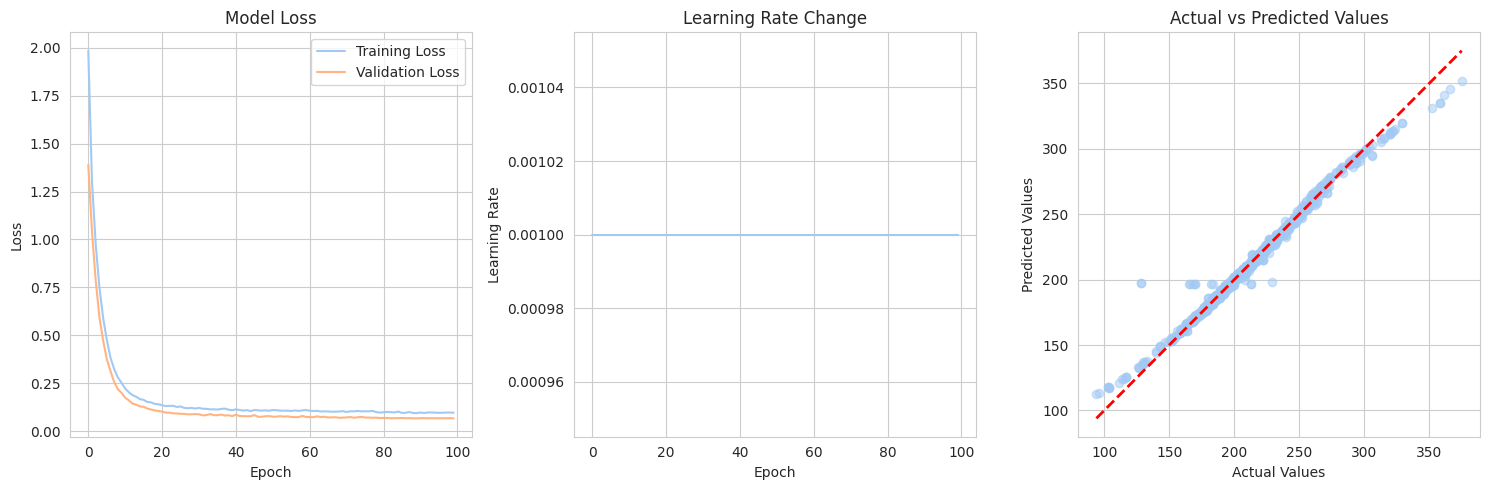

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


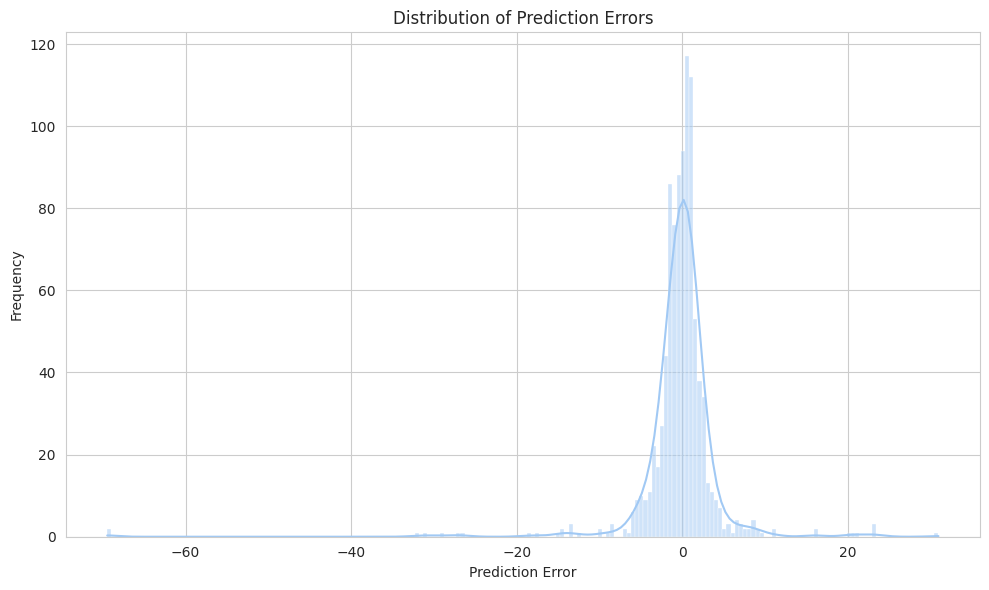


Model saved: cnn_model_20241227_182459.h5


In [34]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import time
from datetime import datetime


# Data preprocessing start time
preprocess_start = time.time()


total_start_time = time.time()

# Time formatting function
def format_time(seconds):
    minutes = seconds // 60
    seconds = seconds % 60
    return f"{int(minutes)}min {seconds:.2f}sec"

# Model summary printing function
def print_model_summary(model):
    print("\nModel Architecture:")
    print("=" * 50)
    model.summary()

    # Print model parameters
    total_params = model.count_params()
    trainable_params = sum([tf.keras.backend.count_params(w) for w in model.trainable_weights])
    non_trainable_params = total_params - trainable_params

    print("\nModel Parameters:")
    print("=" * 50)
    print(f"Total number of parameters: {total_params:,}")
    print(f"Number of trainable parameters: {trainable_params:,}")
    print(f"Number of non-trainable parameters: {non_trainable_params:,}")

# Load data (You'll need to adjust this part according to your dataset)
# Example: data = pd.read_csv('your_data.csv')
# X = data.drop('target_column', axis=1)
# y = data['target_column']

# Save start time
start_time = time.time()

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale data
scaler_X = StandardScaler()
X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)

scaler_y = StandardScaler()
y_train_scaled = scaler_y.fit_transform(y_train.reshape(-1, 1)).flatten()
y_test_scaled = scaler_y.transform(y_test.reshape(-1, 1)).flatten()

# Calculate data preparation time
data_prep_time = time.time() - start_time
X_train_reshaped = X_train_scaled.reshape((X_train_scaled.shape[0], X_train_scaled.shape[1], 1))
X_test_reshaped = X_test_scaled.reshape((X_test_scaled.shape[0], X_test_scaled.shape[1], 1))
preprocess_time = time.time() - preprocess_start
# Model hyperparameters
LEARNING_RATE = 0.001
BATCH_SIZE = 64
EPOCHS = 100
DROPOUT_RATE = 0.3
L2_LAMBDA = 0.01
model_build_start = time.time()
# Model architecture
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],),
          kernel_regularizer=tf.keras.regularizers.l2(L2_LAMBDA)),
    Dropout(DROPOUT_RATE),
    Dense(64, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(L2_LAMBDA)),
    Dropout(DROPOUT_RATE),
    Dense(32, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(L2_LAMBDA)),
    Dropout(DROPOUT_RATE),
    Dense(16, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(L2_LAMBDA)),
    Dense(1)
])

# Model summary
print_model_summary(model)


# Save start time
total_start_time = time.time()

# Data loading start time


# Load data (You'll need to adjust this part according to your dataset)
# Example: data = pd.read_csv('your_data.csv')
# X = data.drop('target_column', axis=1)
# y = data['target_column']

# Data loading time


# Data preprocessing start time
preprocess_start = time.time()
model_build_time = time.time() - model_build_start
# Optimizer
optimizer = Adam(learning_rate=LEARNING_RATE)

# Compile model
model.compile(optimizer=optimizer, loss='mean_squared_error')

# Callbacks
early_stopping = EarlyStopping(patience=20, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(factor=0.2, patience=10, min_lr=0.00001)

# Training start time
train_start_time = time.time()

# Model training
history = model.fit(
    X_train_reshaped, y_train_scaled,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    validation_split=0.2,
    callbacks=[early_stopping, reduce_lr],
    verbose=1
)

# Calculate training time
# Training time
training_time = time.time() - train_start_time

# Evaluation start time
eval_start_time = time.time()


#

from sklearn.metrics import explained_variance_score

# Make predictions on test set
y_pred_train_scaled = model.predict(X_train_reshaped).flatten()
y_pred_scaled = model.predict(X_test_reshaped).flatten()

# Normalized metrics
r2_train_norm = r2_score(y_train_scaled, y_pred_train_scaled)
mse_train_norm = mean_squared_error(y_train_scaled, y_pred_train_scaled)
rmse_train_norm = np.sqrt(mse_train_norm)
mae_train_norm = np.mean(np.abs(y_train_scaled - y_pred_train_scaled))

# Mean Absolute Percentage Error (MAPE)
mape_train_norm = np.mean(np.abs((y_train_scaled - y_pred_train_scaled) / y_train_scaled)) * 100

# Adjusted R² (Düzeltilmiş R²) for training
n_train = len(y_train_scaled)  # Number of training samples
p = X_train_reshaped.shape[1]  # Number of features
adjusted_r2_train_norm = 1 - ((1 - r2_train_norm) * (n_train - 1) / (n_train - p - 1))

# Explained Variance Score
explained_variance_train_norm = explained_variance_score(y_train_scaled, y_pred_train_scaled)

r2_norm = r2_score(y_test_scaled, y_pred_scaled)
mse_norm = mean_squared_error(y_test_scaled, y_pred_scaled)
rmse_norm = np.sqrt(mse_norm)
mae_norm = np.mean(np.abs(y_test_scaled - y_pred_scaled))

# Mean Absolute Percentage Error (MAPE)
mape_norm = np.mean(np.abs((y_test_scaled - y_pred_scaled) / y_test_scaled)) * 100

# Adjusted R² (Düzeltilmiş R²) for test
n_test = len(y_test_scaled)  # Number of test samples
adjusted_r2_norm = 1 - ((1 - r2_norm) * (n_test - 1) / (n_test - p - 1))

# Explained Variance Score
explained_variance_norm = explained_variance_score(y_test_scaled, y_pred_scaled)

# Original scale metrics
y_test_original = scaler_y.inverse_transform(y_test_scaled.reshape(-1, 1)).flatten()
y_pred_original = scaler_y.inverse_transform(y_pred_scaled.reshape(-1, 1)).flatten()

r2_orig = r2_score(y_test_original, y_pred_original)
mse_orig = mean_squared_error(y_test_original, y_pred_original)
rmse_orig = np.sqrt(mse_orig)
mae_orig = np.mean(np.abs(y_test_original - y_pred_original))

# Mean Absolute Percentage Error (MAPE) for original scale
mape_orig = np.mean(np.abs((y_test_original - y_pred_original) / y_test_original)) * 100

# Adjusted R² (Düzeltilmiş R²) for original scale
adjusted_r2_orig = 1 - ((1 - r2_orig) * (n_test - 1) / (n_test - p - 1))

# Explained Variance Score for original scale
explained_variance_orig = explained_variance_score(y_test_original, y_pred_original)

# Print the metrics
print(f"Normalized Metrics (Training):")
print(f"R²: {r2_train_norm}")
print(f"MSE: {mse_train_norm}")
print(f"RMSE: {rmse_train_norm}")
print(f"MAE: {mae_train_norm}")
print(f"MAPE: {mape_train_norm}")
print(f"Adjusted R²: {adjusted_r2_train_norm}")
print(f"Explained Variance Score: {explained_variance_train_norm}")

print(f"\nNormalized Metrics (Test):")
print(f"R²: {r2_norm}")
print(f"MSE: {mse_norm}")
print(f"RMSE: {rmse_norm}")
print(f"MAE: {mae_norm}")
print(f"MAPE: {mape_norm}")
print(f"Adjusted R²: {adjusted_r2_norm}")
print(f"Explained Variance Score: {explained_variance_norm}")

print(f"\nOriginal Scale Metrics (Test):")
print(f"R²: {r2_orig}")
print(f"MSE: {mse_orig}")
print(f"RMSE: {rmse_orig}")
print(f"MAE: {mae_orig}")
print(f"MAPE: {mape_orig}")
print(f"Adjusted R²: {adjusted_r2_orig}")
print(f"Explained Variance Score: {explained_variance_orig}")


# Evaluation time
eval_time = time.time() - eval_start_time

# Total time
total_time = time.time() - total_start_time

# Print results
print("\nTime Metrics:")
print("=" * 50)

print(f"Data preprocessing time: {format_time(preprocess_time)}")
print(f"Model building time: {format_time(model_build_time)}")
print(f"Training time: {format_time(training_time)}")
print(f"test time: {format_time(eval_time)}")
print(f"Total time: {format_time(total_time)}")

print("\nModel Hyperparameters:")
print("=" * 50)
print(f"Learning rate: {LEARNING_RATE}")
print(f"Batch size: {BATCH_SIZE}")
print(f"Maximum epochs: {EPOCHS}")
print(f"Actual epochs: {len(history.history['loss'])}")
print(f"Dropout rate: {DROPOUT_RATE}")
print(f"L2 regularization lambda: {L2_LAMBDA}")

print("\nModel Performance Metrics:")
print("=" * 50)


print("Train için")
print(f"                  Normalized      ")
print(f"R-squared (R²):   {r2_train_norm:.4f}       ")
print(f"MSE:              {mse_train_norm :.4f}        ")
print(f"RMSE:             {rmse_train_norm :.4f}        ")
print(f"MAE:              {mae_train_norm :.4f}        ")

print("Test için")

print(f"                  Normalized      Original")
print(f"R-squared (R²):   {r2_norm:.4f}        {r2_orig:.4f}")
print(f"MSE:              {mse_norm:.4f}        {mse_orig:.4f}")
print(f"RMSE:             {rmse_norm:.4f}        {rmse_orig:.4f}")
print(f"MAE:              {mae_norm:.4f}        {mae_orig:.4f}")



# Training and validation loss plot
plt.figure(figsize=(15, 5))

# Loss plot
plt.subplot(1, 3, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()

# Learning rate change
plt.subplot(1, 3, 2)
lr_values = [LEARNING_RATE]
for i in range(1, len(history.history['loss'])):
    if 'lr' in history.history:
        lr_values.append(history.history['lr'][i-1])
    else:
        lr_values.append(lr_values[-1])
plt.plot(lr_values)
plt.title('Learning Rate Change')
plt.ylabel('Learning Rate')
plt.xlabel('Epoch')

# Actual vs Predicted
plt.subplot(1, 3, 3)
plt.scatter(y_test_original, y_pred_original, alpha=0.5)
plt.plot([y_test_original.min(), y_test_original.max()],
         [y_test_original.min(), y_test_original.max()], 'r--', lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')

plt.tight_layout()
plt.show()

# Error distribution histogram
plt.figure(figsize=(10, 6))
errors = y_test_original - y_pred_original
sns.histplot(errors, kde=True)
plt.xlabel('Prediction Error')
plt.ylabel('Frequency')
plt.title('Distribution of Prediction Errors')
plt.tight_layout()
plt.show()

# Save model
timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
model_path = f'cnn_model_{timestamp}.h5'
model.save(model_path)
print(f"\nModel saved: {model_path}")



# Clear memory
tf.keras.backend.clear_session()

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


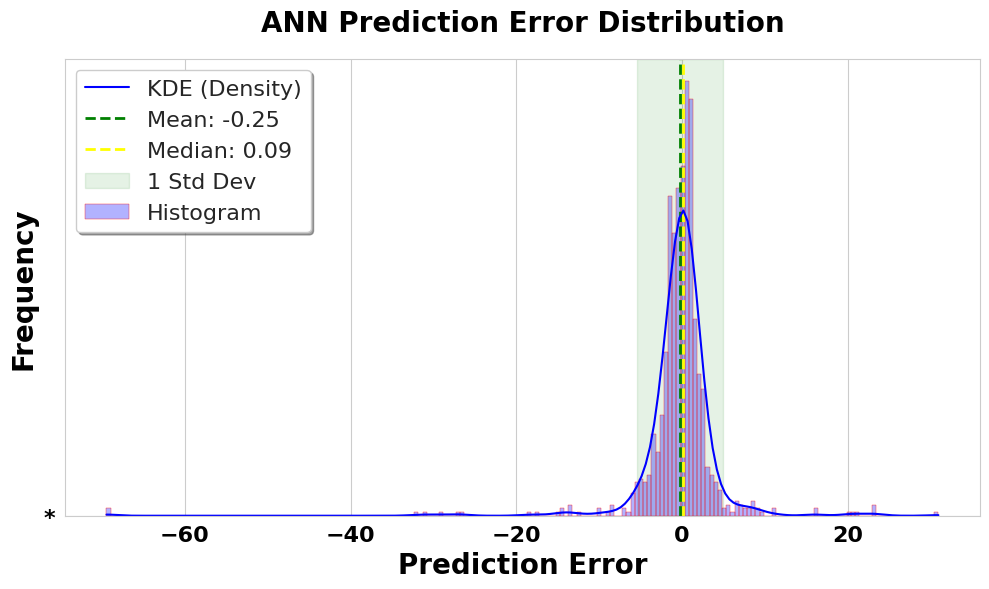

In [35]:
 # Error distribution histogram
errors = y_test_original - y_pred_original
plt.figure(figsize=(10, 6),dpi=100)
sns.set_style("whitegrid")  # Modern stil
sns.set_palette("pastel")  # Yumuşak renk paleti

mean_error = np.mean(errors)
median_error = np.median(errors)
std_dev = np.std(errors)

plt.plot( '*', markersize=6,
         label='KDE (Density)', color='blue')

plt.axvline(mean_error, color='green', linestyle='dashed', linewidth=2, label=f'Mean: {mean_error:.2f}')
plt.axvline(median_error, color='yellow', linestyle='dashed', linewidth=2, label=f'Median: {median_error:.2f}')
plt.axvspan(mean_error - std_dev, mean_error + std_dev, color='green', alpha=0.1, label='1 Std Dev')


sns.histplot(errors, kde=True, color="blue", edgecolor="red", alpha=0.3, label="Histogram")
plt.xlabel('Prediction Error', fontsize=20, weight='bold', color="black")
plt.ylabel('Frequency', fontsize=20, weight='bold', color="black")
plt.title('Distribution of Prediction Errors')
plt.xticks(fontsize=16, color="black", weight='bold')
plt.yticks(fontsize=16, color="black", weight='bold')
plt.title('ANN Prediction Error Distribution', fontsize=20, weight='bold', color="black", pad=20)
plt.legend(fontsize=16, loc='upper left', frameon=True, shadow=True, facecolor='white')
plt.tight_layout()
plt.show()


In [ ]:
# Continue from previous code...

# New performance plot
plt.figure(figsize=(8, 6),dpi=300)

# Calculate and add R-squared value
r2_value = r2_score(y_test_original, y_pred_original)
plt.plot([], [], ' ', label=f'R$^2$: {r2_value:.2f}')

# Scatter plot of predictions vs actual values
plt.plot(y_test_original, y_pred_original, '*', markersize=6,
         label='Actual vs Predicted Values', color='red')

# Regression line
plt.plot([y_test_original.min(), y_test_original.max()],
         [y_test_original.min(), y_test_original.max()],
         'r--', label='Regression Line', color='blue', linewidth=4)

# Graph titles and labels
plt.xlabel('Actual Values', fontsize=20)
plt.ylabel('Predicted Values', fontsize=20)
plt.title('ANN Regression Plot', fontsize=20)

# Legend settings
legend = plt.legend(fontsize=14, loc='upper left',
                   facecolor='#D7F8FD', frameon=True)
legend.get_frame().set_alpha(0.8)

# Grid and other visual settings
plt.grid(True)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.tight_layout()
plt.savefig('ANN_Regression_Plot.svg')
plt.show()
# Save the plot as SVG

